## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Reading the dataset into a DataFrame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CC_GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df = df.fillna(0)

In [7]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CUST_ID_C19181,CUST_ID_C19182,CUST_ID_C19183,CUST_ID_C19184,CUST_ID_C19185,CUST_ID_C19186,CUST_ID_C19187,CUST_ID_C19188,CUST_ID_C19189,CUST_ID_C19190
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,False,False,False,False,False,False,False,False,False,False
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,False,False,False,False,False,False,False,False,False,False
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df = pd.get_dummies(df)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

Choose the optimal K and calculate the silhouette score for the best model.

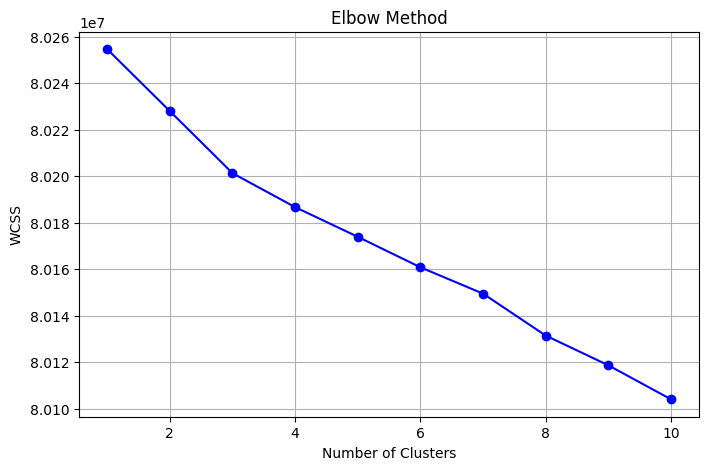

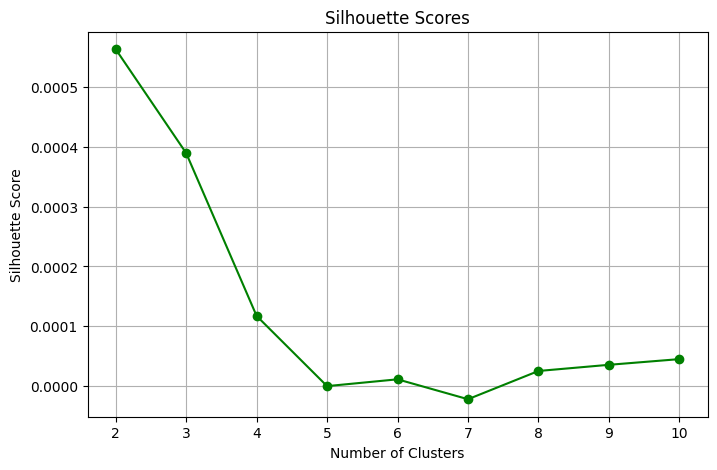

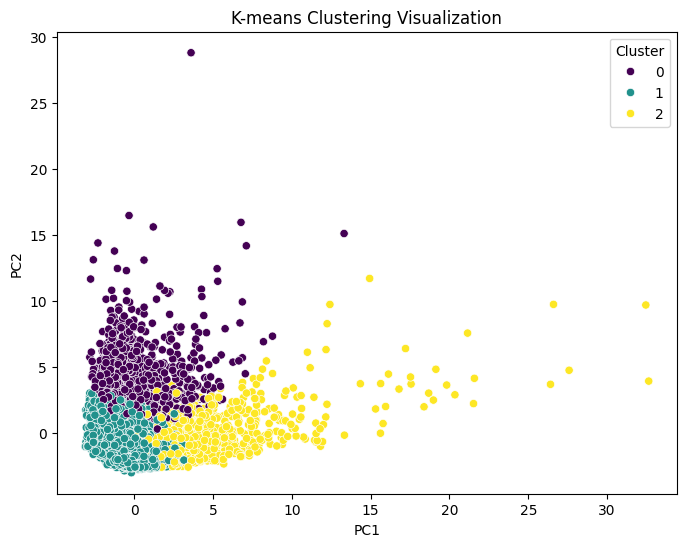

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()




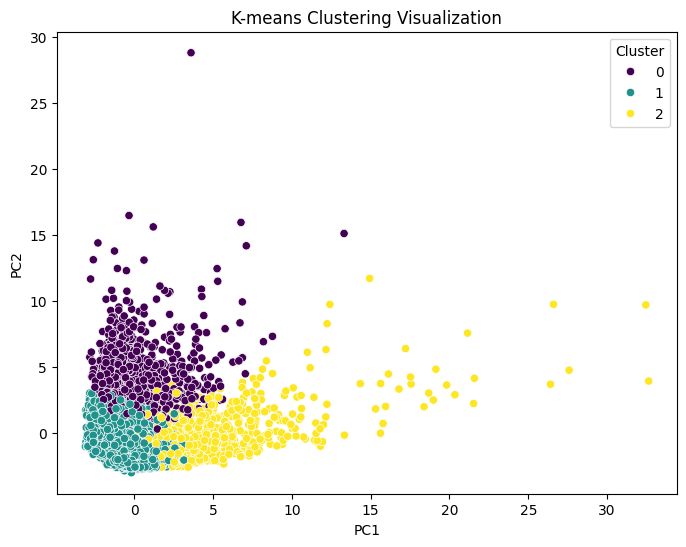

In [ ]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_final.fit(scaled_df)

clusters = kmeans_final.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-means Clustering Visualization')
plt.show()

In [ ]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_k}")


The optimal number of clusters based on Silhouette Score is: 2


## Agglomerative Clustering

*Find* the optimal agglomerative clustering model.

In [ ]:
from joblib import Parallel, delayed
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_list = ["average", "complete"]
affinity_list = ["euclidean", "manhattan"]
n = np.arange(2, 11)
best = {"score": -1, "n_clusters": 0, "linkage": "", "metric": ""}

def evaluate_model(n_clusters, affinity, linkage):
    try:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric=affinity, linkage=linkage)
        model = model.fit(scaled_df)
        score = silhouette_score(scaled_df, model.labels_)
        return {"score": score, "n_clusters": n_clusters, "linkage": linkage, "metric": affinity}
    except Exception as e:

        return {"error": f"Skipped n_clusters={n_clusters}, metric='{affinity}', linkage='{linkage}' due to {e}"}

results = Parallel(n_jobs=-1)(
    delayed(evaluate_model)(n_clusters, affinity, linkage)
    for n_clusters in n
    for affinity in affinity_list
    for linkage in linkage_list
)

for result in results:
    if "error" in result:
        continue
    if result["score"] > best["score"]:
        best = result

print(f"The optimal Agglomerative Clustering model has:")
print(f"  - {best['n_clusters']} clusters")
print(f"  - Linkage method: {best['linkage']}")
print(f"  - Metric: {best['metric']}")
print(f"  - Best Silhouette Score: {best['score']:.3f}")


The optimal Agglomerative Clustering model has:
  - 2 clusters
  - Linkage method: average
  - Metric: euclidean
  - Best Silhouette Score: 0.030


Choose the optimal K and calculate the silhouette score for the best model.

## DBSCAN

Find the optimal DBSCAN model.

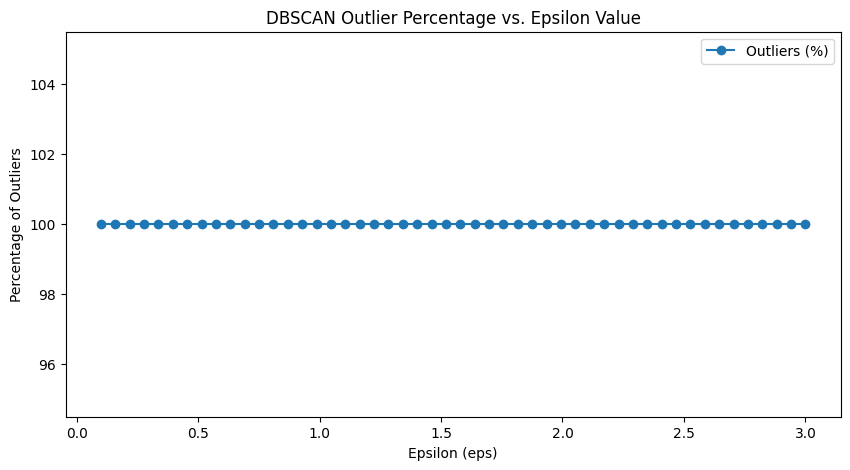

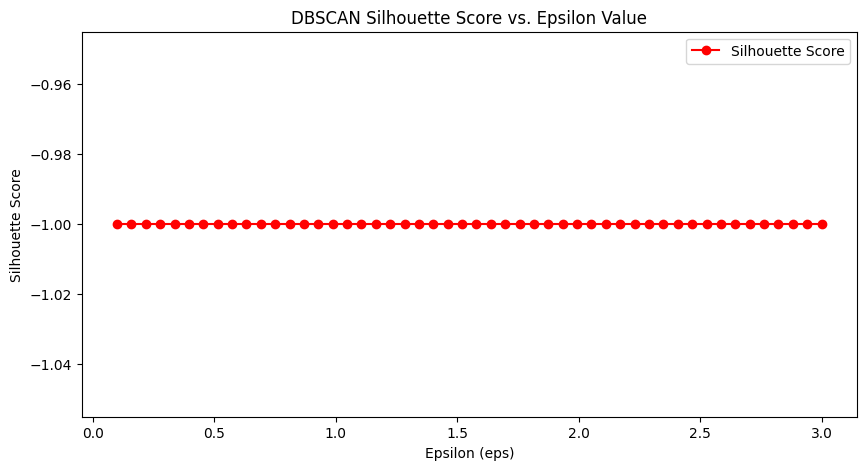

No valid DBSCAN model found. Try adjusting the epsilon range.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

eps_values = np.linspace(0.1, 3, 50)

outliers_percentage = []
silhouette_scores = []

min_samples = 2 * df_scaled.shape[1]

best_silhouette = -1
best_eps = None
best_labels = None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)

    outlier_percent = 100 * np.sum(labels == -1) / len(labels)
    outliers_percentage.append(outlier_percent)

    if len(set(labels)) > 1 and -1 not in set(labels):
        silhouette_avg = silhouette_score(df_scaled, labels)
        silhouette_scores.append(silhouette_avg)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_labels = labels
    else:
        silhouette_scores.append(-1)

plt.figure(figsize=(10, 5))
plt.plot(eps_values, outliers_percentage, marker='o', label='Outliers (%)')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Percentage of Outliers')
plt.title('DBSCAN Outlier Percentage vs. Epsilon Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Score vs. Epsilon Value')
plt.legend()
plt.show()

if best_eps:
    print(f"Optimal eps: {best_eps:.3f}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}")
else:
    print("No valid DBSCAN model found. Try adjusting the epsilon range.")


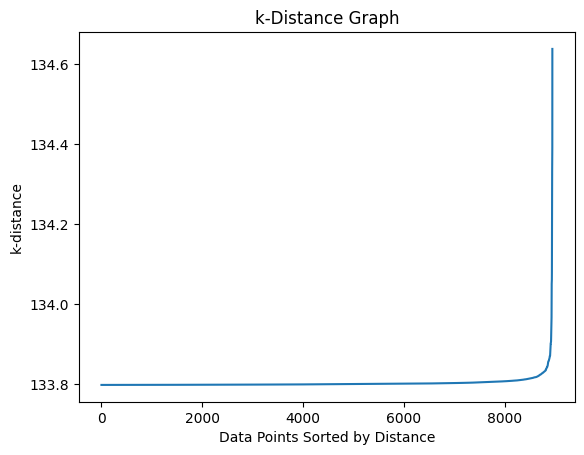

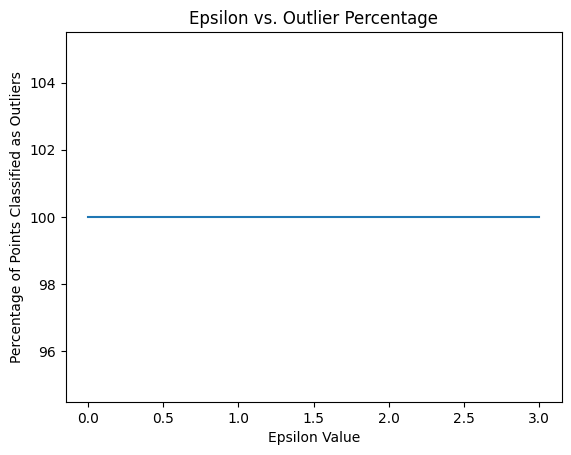

Number of clusters found: 0
Percentage of points classified as outliers: 100.00%
Silhouette score cannot be calculated with fewer than 2 clusters.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances[:, 1])
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Data Points Sorted by Distance')
plt.title('k-Distance Graph')
plt.show()



Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

eps_values = np.linspace(0.1, 5, 50)
min_samples_values = [2, 4, 6, 8, 10]
best_silhouette = -1
best_params = {}
outlier_percent = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(scaled_df)

        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        if num_clusters > 1:
            sil_score = silhouette_score(scaled_df, cluster_labels)
            perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
            outlier_percent.append(perc_outliers)

            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}

plt.plot(eps_values, outlier_percent)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Points Classified as Outliers')
plt.title('Outliers vs. Epsilon Value')
plt.show()

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette:.2f}")

dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
final_labels = dbscan.fit_predict(scaled_df)
final_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)
final_outlier_percent = 100 * np.sum(final_labels == -1) / len(final_labels)

print(f"Number of Clusters: {final_clusters}")
print(f"Percentage of Points Classified as Outliers: {final_outlier_percent:.2f}%")


## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?